## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [141]:
# Use this cell to begin your analysis, and add as many as you would like!

### Import Packages

In [142]:
import pandas as pd
import matplotlib.pylab as plt

### Explore Dataset

In [143]:
office_db = pd.read_csv('datasets/office_episodes.csv')
office_db.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


### Visualize Data

In [144]:
colors = []
for lab, row in office_db.iterrows():
    if row['scaled_ratings'] < 0.25:
        colors.append('red')
    elif row['scaled_ratings'] >= 0.25 and row['scaled_ratings'] < 0.50:
        colors.append('orange')
    elif row['scaled_ratings'] >= 0.50 and row['scaled_ratings'] < 0.75:
        colors.append('lightgreen')
    else: 
        colors.append('darkgreen')

In [145]:
size = []
for lab, row in office_db.iterrows():
    if row['has_guests'] == True:
        size.append(250)
    else:
        size.append(25)

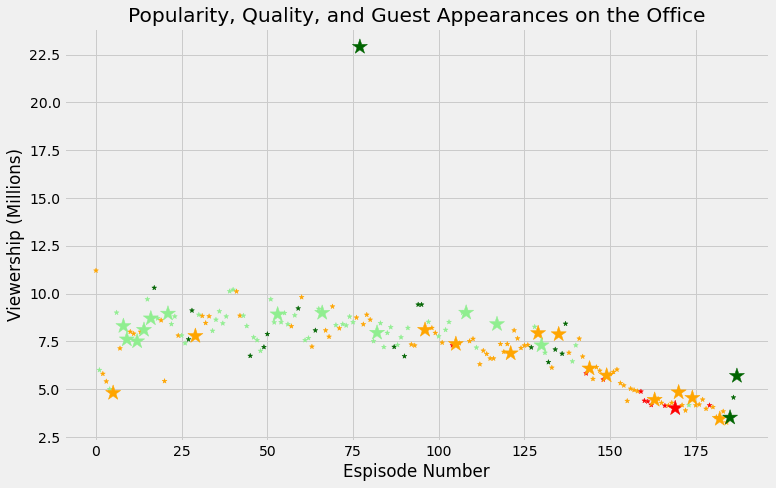

In [146]:
fig = plt.figure
plt.rcParams['figure.figsize'] = [11, 7]
plt.scatter(office_db['episode_number'], office_db['viewership_mil'], c = colors, s = size, marker='*')
plt.xlabel('Espisode Number')
plt.ylabel('Viewership (Millions)')
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.show()

In [147]:
# def data_vis():
#     def data_colors():
#         colors = []
#         for lab, row in office_db.iterrows():
#             if row['scaled_ratings'] < 0.25:
#                 colors.append('red')
#             elif row['scaled_ratings'] >= 0.25 and row['scaled_ratings'] < 0.50:
#                 colors.append('orange')
#             elif row['scaled_ratings'] >= 0.50 and row['scaled_ratings'] < 0.75:
#                 colors.append('lightgreen')
#             else: 
#                 colors.append('darkgreen')
#         return colors 

#     def data_size():
#         size = []
#         for lab, row in office_db.iterrows():
#             if row['has_guests'] == True:
#                 size.append(250)
#             else:
#                 size.append(25)
#         return size 

#     plt.rcParams['figure.figsize'] = [11, 7]
#     plt.scatter(office_db['episode_number'], office_db['viewership_mil'], c = data_colors(), s = data_size(), marker='*')
#     plt.xlabel('Espisode Number')
#     plt.ylabel('Viewership (Millions)')
#     plt.title('Popularity, Quality, and Guest Appearances on the Office')
    
#     return plt.show()

In [148]:
# data_vis()

In [149]:
# def guest_name():
#     star_name = []
#     for lab, row in office_db.iterrows():
#         if row['has_guests'] == True:
#             star_name.append(row['guest_stars'])
#     return star_name

In [150]:
star_name = []
for lab, row in office_db.iterrows():
    if row['has_guests'] == True:
        star_name.append(row['guest_stars'])

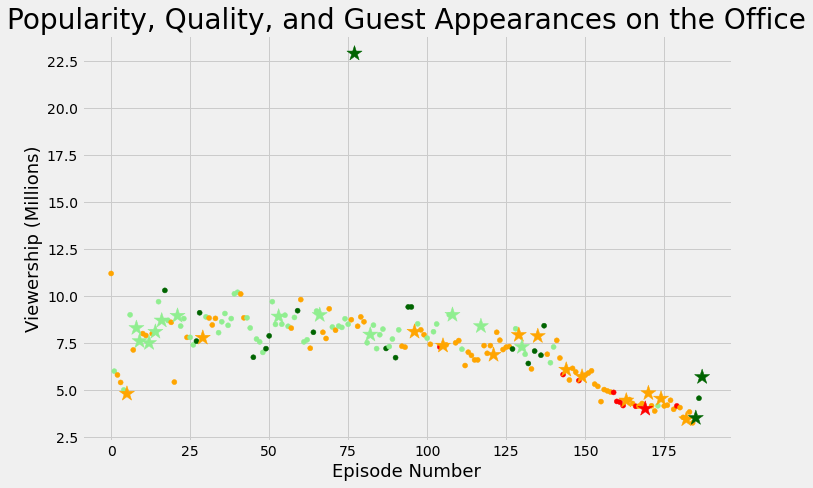

In [151]:
office_df = pd.read_csv('datasets/office_episodes.csv', parse_dates=['release_date'])
# Initiatlize two empty lists
cols = []
sizes = []

# Iterate through the DataFrame, and assign colors based on the rating
for ind, row in office_df.iterrows():
    if row['scaled_ratings'] < 0.25:
        cols.append('red')
    elif row['scaled_ratings'] < 0.50:
        cols.append('orange')
    elif row['scaled_ratings'] < 0.75:
        cols.append('lightgreen')
    else:
        cols.append('darkgreen')

# Iterate through the DataFrame, and assign a size based on whether it has guests        
for ind, row in office_df.iterrows():
    if row['has_guests'] == False:
        sizes.append(25)
    else:
        sizes.append(250)

# For ease of plotting, add our lists as columns to the DataFrame
office_df['colors'] = cols
office_df['sizes'] = sizes

# Split data into guest and non_guest DataFrames
non_guest_df = office_df[office_df['has_guests'] == False]
guest_df = office_df[office_df['has_guests'] == True]

# Set the figure size and plot style        
plt.rcParams['figure.figsize'] = [11, 7]
plt.style.use('fivethirtyeight')

# Create the figure
fig = plt.figure()

# Create two scatter plots with the episode number on the x axis, and the viewership on the y axis

# Create a normal scatter plot for regular episodes
plt.scatter(x=non_guest_df.episode_number, y=non_guest_df.viewership_mil, \
                 # Assign our color list as the colors and set marker and size
                 c=non_guest_df['colors'], s=25)

# Create a starred scatterplot for guest star episodes
plt.scatter(x=guest_df.episode_number, y=guest_df.viewership_mil, \
                 # Assign our color list as the colors and set marker and size
                 c=guest_df['colors'], marker='*', s=250)

# Create a title
plt.title("Popularity, Quality, and Guest Appearances on the Office", fontsize=28)

# Create an x-axis label
plt.xlabel("Episode Number", fontsize=18)

# Create a y-axis label
plt.ylabel("Viewership (Millions)", fontsize=18)

# Show the plot
plt.show()

In [152]:
print(office_df[office_df['viewership_mil'] > 20]['guest_stars'])


77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object


In [153]:
top_star = 'Jessica Alba'